In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
mean_01 = np.array([3.0, 4.0])   #2 random means
mean_02 = np.array([0.0, -1.0])

cov_01 = np.array([[1.0, 0.0],[0.0, 1.0]])  #standard covariance
cov_02 = np.array([[0.75, 0.4], [0.4, 0.6]])  #random covariance 

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 200)   #created normal distrib. of both
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 200)   

print dist_01.shape, dist_02.shape

(200, 2) (200, 2)


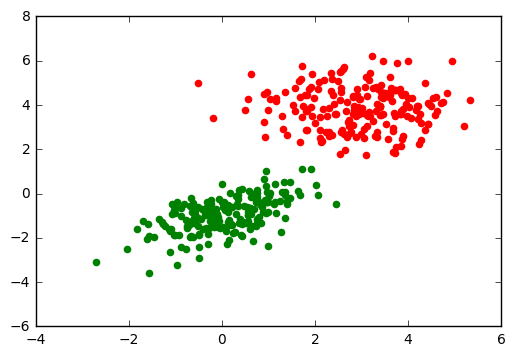

In [4]:
plt.figure(0)
for ix in range(dist_01.shape[0]):                                #plot both random distrib.
    plt.scatter(dist_01[ix, 0], dist_01[ix, 1], color='red')
    plt.scatter(dist_02[ix, 0], dist_02[ix, 1], color='green')
plt.show()

0.5


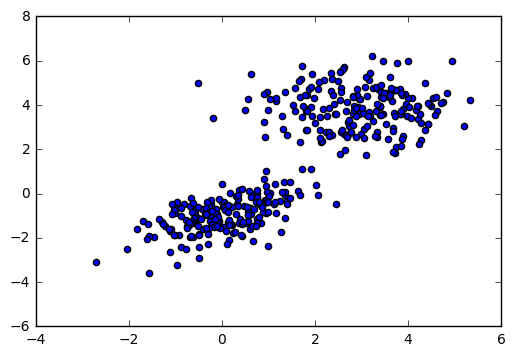

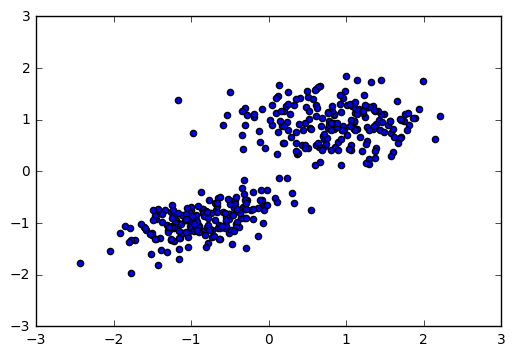

In [5]:
labels = np.zeros((400,))                  #create label array nx1 row array 
labels[200:] = 1.0                                #n/2 :   values ->1
print labels.mean()

X_data = np.zeros((400, 2))              #400x2 zeroes array
X_data[:200, :] = dist_01               #dist_01  upper half
X_data[200:, :] = dist_02               #dist_02 lower half
  
plt.figure(0)                        
plt.scatter(X_data[:, 0], X_data[:, 1])   #plotted values

X_std = (X_data - X_data.mean(axis=0))/X_data.std(axis=0)   #standardized all points

plt.figure(1)
plt.scatter(X_std[:, 0], X_std[:, 1])      #plot new standard points

plt.show()

In [6]:
def dist(x1, x2):                               #distance between 2 points calculating function
    return np.sqrt(((x1 - x2)**2).sum())        
    # return abs(x1-x2).sum()
    # return np.sqrt(0.5*((np.sqrt(x1) - np.sqrt(x2))**2).sum())

print dist(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

1.41421356237


In [10]:
def knn(X_train, x, y_train, k=5):              
    vals = []           
                                                    
    for ix in range(X_train.shape[0]):                #loop to create list vals =[[dist. bw 1st..n pt. with q pt.,label]] 
        v = [dist(x, X_train[ix, :]), y_train[ix]]    
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x: x[0])     #sort vals
    pred_arr = np.asarray(updated_vals[:k])              #converted to array for top k values
    pred_arr = np.unique(pred_arr[:, 1], return_counts=True)  #new array with only unique values(labels) and freq.
    pred = pred_arr[1].argmax()                               #[value with max freq(count),label]
    print pred_arr                                
    # return pred_arr[0][pred]
    return pred_arr

q = np.array([0.10, 0.0])       #pt. to calculate distances from 

res = knn(X_std, q, labels, k=7)   # pass standardized array,pt q,labels, k=no. of neighbours to consider
print res

(array([ 0.,  1.]), array([2, 5]))
(array([ 0.,  1.]), array([2, 5]))
